<a href="https://colab.research.google.com/github/YogeshPandey29/Projects/blob/master/SVM_Implementation_upon_IRIS_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook,  I have taken the same beginner's dataset named "IRIS Dataset". Our task in this implmentation is to predict from which class of flowers (setosa, virginica and versicolor), a particular flower belongs to.
We have 4 features (predictor vars) in this dataset namely "sepal_length", "sepal_width", "petal_length", "petal_width", and we make use of these features to predict the class of flowers.
**This is my take on this problem using a SUPPORT VECTOR MACHINE classifier.**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
data = pd.read_csv("iris dataset.csv")
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['species']= le.fit_transform(data['species'])
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
data.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


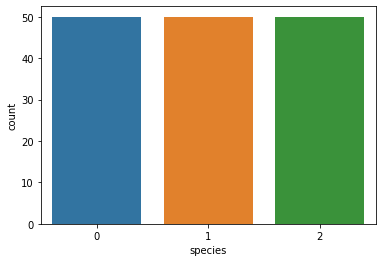

In [32]:
sns.countplot(data['species'])

In [14]:
df0 = data[data['species'] == 0]
df1 = data[data['species'] == 1]
df2 = data[data['species'] == 2]

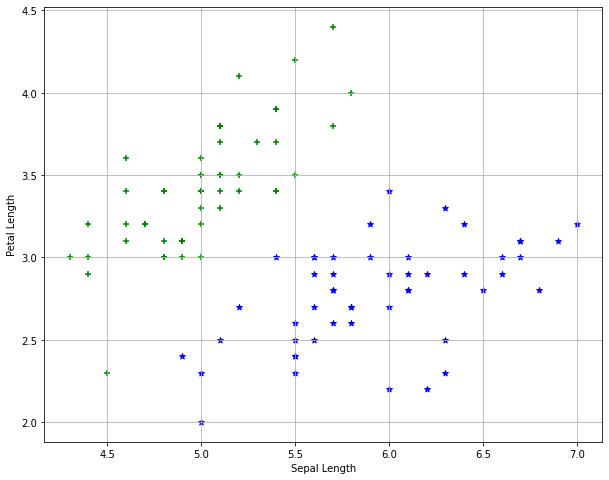

In [21]:
plt.figure(figsize = (10, 8))
plt.scatter(df0['sepal_length'], df0['sepal_width'], color = 'Green', marker = '+')
plt.scatter(df1['sepal_length'], df1['sepal_width'], color = 'Blue', marker = '*')
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.grid(True)
plt.show()

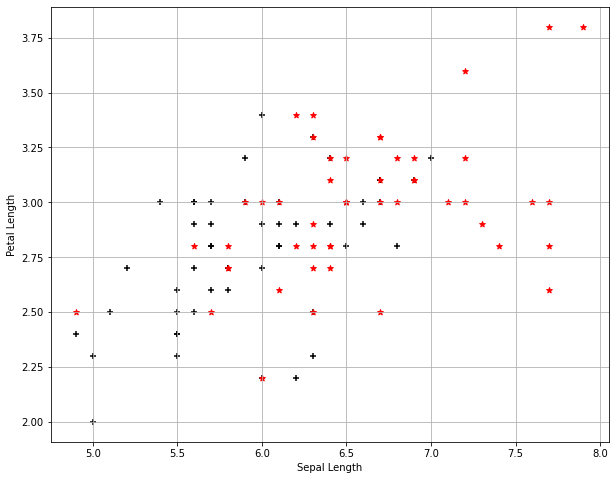

In [26]:
plt.figure(figsize = (10, 8))
plt.scatter(df1['sepal_length'], df1['sepal_width'], color = 'Black', marker = '+')
plt.scatter(df2['sepal_length'], df2['sepal_width'], color = 'Red', marker = '*')
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.grid(True)
plt.show()

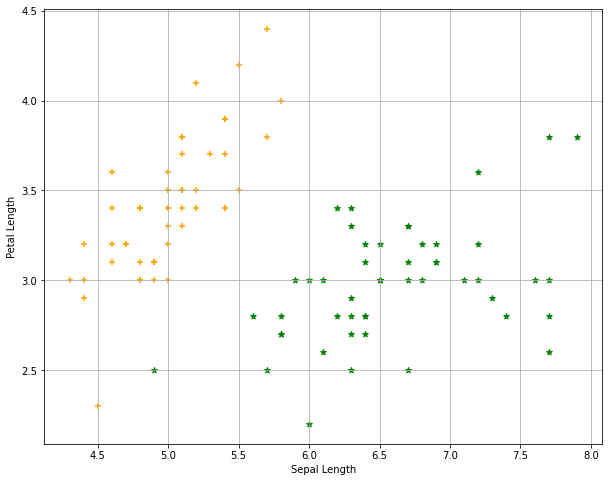

In [27]:
plt.figure(figsize = (10, 8))
plt.scatter(df0['sepal_length'], df0['sepal_width'], color = 'Orange', marker = '+')
plt.scatter(df2['sepal_length'], df2['sepal_width'], color = 'Green', marker = '*')
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.grid(True)
plt.show()

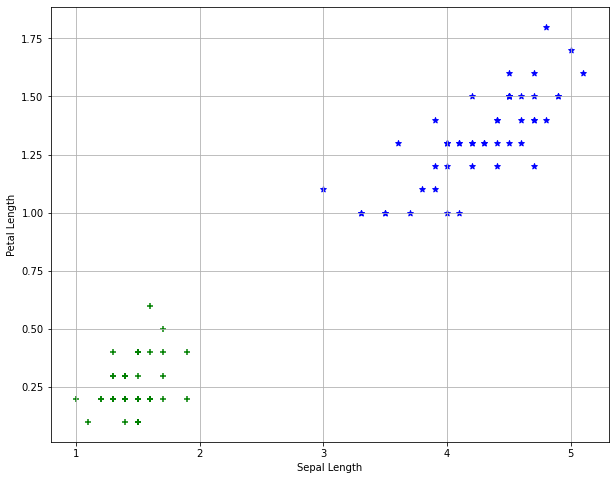

In [28]:
plt.figure(figsize = (10, 8))
plt.scatter(df0['petal_length'], df0['petal_width'], color = 'Green', marker = '+')
plt.scatter(df1['petal_length'], df1['petal_width'], color = 'Blue', marker = '*')
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.grid(True)
plt.show()

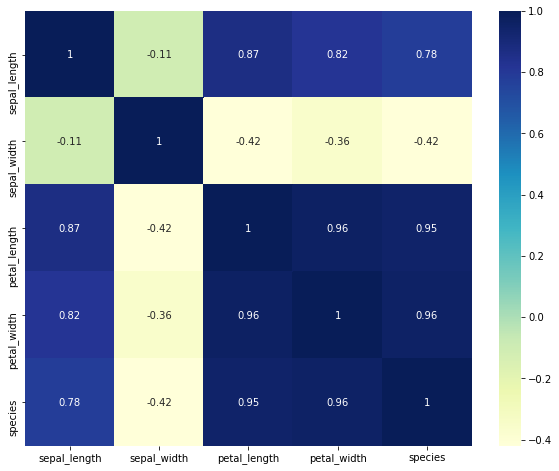

In [30]:
plt.figure(figsize = (10, 8))
sns.heatmap(data.corr(), annot = True, cmap = "YlGnBu")

In [34]:
X = data.iloc[:, 0:4]
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [35]:
y = data.iloc[:, 4]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
print(X_train, y_train)

     sepal_length  sepal_width  petal_length  petal_width
97            6.2          2.9           4.3          1.3
88            5.6          3.0           4.1          1.3
21            5.1          3.7           1.5          0.4
12            4.8          3.0           1.4          0.1
28            5.2          3.4           1.4          0.2
..            ...          ...           ...          ...
36            5.5          3.5           1.3          0.2
113           5.7          2.5           5.0          2.0
76            6.8          2.8           4.8          1.4
139           6.9          3.1           5.4          2.1
15            5.7          4.4           1.5          0.4

[120 rows x 4 columns] 97     1
88     1
21     0
12     0
28     0
      ..
36     0
113    2
76     1
139    2
15     0
Name: species, Length: 120, dtype: int64


In [38]:
print(X_test, y_test)

     sepal_length  sepal_width  petal_length  petal_width
106           4.9          2.5           4.5          1.7
119           6.0          2.2           5.0          1.5
102           7.1          3.0           5.9          2.1
41            4.5          2.3           1.3          0.3
92            5.8          2.6           4.0          1.2
62            6.0          2.2           4.0          1.0
60            5.0          2.0           3.5          1.0
99            5.7          2.8           4.1          1.3
124           6.7          3.3           5.7          2.1
86            6.7          3.1           4.7          1.5
138           6.0          3.0           4.8          1.8
2             4.7          3.2           1.3          0.2
8             4.4          2.9           1.4          0.2
95            5.7          3.0           4.2          1.2
33            5.5          4.2           1.4          0.2
81            5.5          2.4           3.7          1.0
27            

In [40]:
from sklearn.svm import SVC
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [42]:
y_predicted = svm_classifier.predict(X_test)
print(y_predicted)

[1 2 2 0 1 1 1 1 2 1 1 0 0 1 0 1 0 2 1 1 1 1 1 1 2 2 0 2 0 1]


In [46]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_predicted)
print(accuracy)                                 #the accuracy score is appx 93.3%

0.9333333333333333


In [48]:
from sklearn.metrics import confusion_matrix
cnf_mtrx = confusion_matrix(y_test, y_predicted)
print(cnf_mtrx)                                     #the model is making 2 wrong predictions

[[ 7  0  0]
 [ 0 14  0]
 [ 0  2  7]]


In [51]:
#now, let's make some sample predictions (on certain unseen values)
sample_pred1 = svm_classifier.predict([[5.9, 2.1, 4.2, 1.8]])
print(sample_pred1)

[1]


In [52]:
sample_pred2 = svm_classifier.predict([[4.2, 1.8, 6.2, 3.8]])
print(sample_pred2)

[2]
